<a href="http://www.road2quant.com">
    <img src="https://uploads-ssl.webflow.com/5eae007d92687089219c5dec/5eb47da29ced78042e9768ce_long_logo.png" align="right" border="0" width="35%" >
</a>

# Black Scholes Merton Model
**Based on Geometric Brownian Motion Simulation**

At the moment of pricing options, the indisputable benchmark is the Black Scholes Merton (BSM) model presented in 1973 at the *Journal of Political Economy*. In the paper, they derive a mathematical formula to price options based on a stock that follows a Geometric Brownian Motion. 

In this work, we will replicate that valuation, but instead of deriving the value of the option mathematically, we are going to generate 1000 paths through Monte Carlo simulation.

## Preparing Environment

### Import Libraries

The libraries that we are going to use are:
- `Math` to transform the data with **square root ($\sqrt{x}$)** and **exponential ($e^{x}$)** 
- `Numpy` to manipulate the data.
- `Matplotlib` to create the charts

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

### Graph Formating

In [2]:
plt.style.use('seaborn')
plt.rcParams['font.family'] = 'serif'
%matplotlib inline

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Market Variables

The BSM model describes the market with one risky asset called the stock ($S$) and one riskless asset known as the bond (represented as a short term interest rate $r$).

For this analysis, the environment that we are defining consist in an initial stock value $S_{0} = 100$  and a constant interest rate $r=0.10$. The volatility of the stock is represented by $\sigma = 0.2$ and the time period for the simulation is one year $t=1$.

In [3]:
S0 = 100.
r = 0.1
sigma = 0.20
T = 1

For the simulation we will use 10,000 different paths ($I=10000$), and the year will be divided into 250 sub-periods ($M=250$).

In [4]:
M = 250
I = 10000
dt = T / M
dt

0.004

## Generate the Geometric Brownian Motion Simulation

To create the different paths, we begin by utilizing the function `np.random.standard_normal` that draw  $(M+1)\times I$ samples from a standard Normal distribution.
To ensure that the mean is 0 and the standard deviation is 1 we adjust the generated values with a technique called moment matching.

In [5]:
z = np.random.standard_normal((M+1,I))
z -= z.mean()
z /= z.std()

Once we have the normally distributed sample matrix, we can proceed to calculate the differents paths utilizing the difference equation of the Geometric Brownian Motion stochastic process.

$$S_t = S_{t - \Delta t} \cdot \exp \left(\left(r - \frac{\sigma^2}{2} \right)\Delta t + \sigma \sqrt{\Delta t} z \right)$$

We substitute the values of the equation with the previously defined variables and replace the $z$ term with the previously generated normal matrix. 

In [6]:
S = np.zeros((M+1,I))
S[0] = S0

In [7]:
for i in range(1,M+1):
    S[i] = S[i-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * math.sqrt(dt) * z[i])

In the chart, we can see a representation of the behaviour of the first 100 paths. Even though all start with a value of 100, the stock's final value varies with the previously mentioned volatility of 20%.

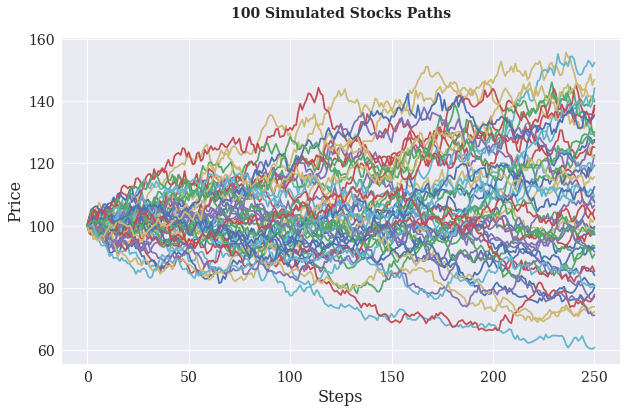

In [8]:
plt.figure(figsize=(10, 6))
plt.title('100 Simulated Stocks Paths',fontweight="bold", pad=20)
plt.xlabel('Steps')
plt.ylabel('Price')
# plt.savefig('paths.png', facecolor='None')
plt.plot(S[:, :50]);

To have a quick snapshot of the 10,000 final values, we represent them with a histogram. As we can see, the distribution is leaned towards a final price over 100, since the generated Brownian motion has a positive drift of the size of $r=0.10$.

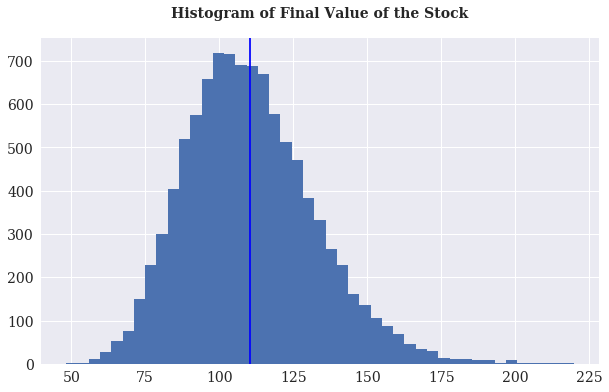

In [9]:
plt.figure(figsize=(10,6))
plt.hist(S[-1], bins=45)
plt.title('Histogram of Final Value of the Stock',fontweight="bold", pad=20);
# plt.savefig('histogram.png', facecolor='None')
plt.axvline(S[-1].mean(), c='b');

We can calculate the mathematical expected value with the following equation: 
$$S_{T} = S_{0} \times exp^{r \times T}$$

In [10]:
S0 * math.exp(r * T)

110.51709180756477

If we observe the mean of the last value of the 10,000 paths, we derive a similar value. This means that the simulation of the stock is a good representation of its theoretical intrinsic value.

In [11]:
S[-1].mean()

110.46058820078105

We can visually explore the convergence of the simulated price to the theoretical value plotting the evolution of the mean for every new sampled observation.

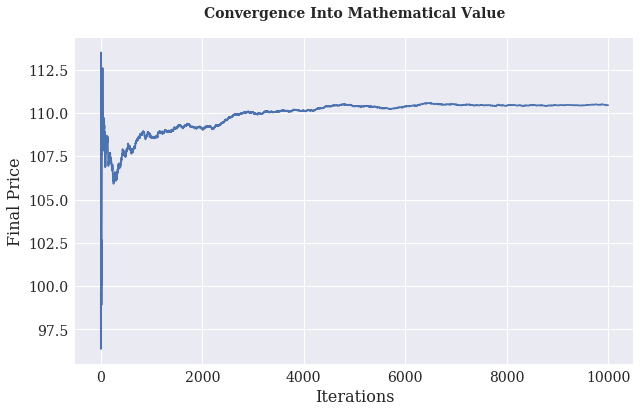

In [12]:
S_sim = np.zeros(I)
for x in range(0,I):
    S_sim[x] = S[-1][0:x+1].mean()
    
plt.figure(figsize=(10, 6))
plt.title('Convergence Into Mathematical Value',fontweight="bold", pad=20)
plt.xlabel('Iterations')
plt.ylabel('Final Price')
# plt.savefig('convergence.png', facecolor='None')
plt.plot(S_sim);

## European Call Pricing

In [13]:
K = 105.

In [14]:
V = np.maximum(0, S[-1] - K)

In [15]:
math.exp(-r * T) * V.mean()

10.37201556832952

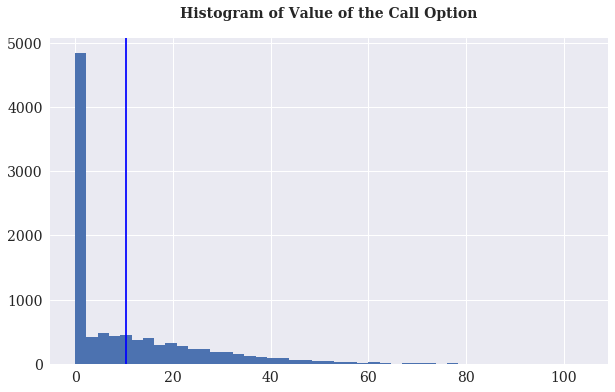

In [16]:
plt.figure(figsize=(10,6))
plt.hist(math.exp(-r * T) * V, bins=45)
plt.title('Histogram of Value of the Call Option',fontweight="bold", pad=20)
# plt.savefig('call.png', facecolor='None')
plt.axvline(math.exp(-r * T) * V.mean(), c='b');

## References

Inspired by the book *Derivatives Analytics with Python* by Yves Hilpisch.

<img src="http://hilpisch.com/images/derivatives_analytics_front.jpg" width="250" style="float:left">


<a href="http://www.road2quant.com">
    <img src="https://uploads-ssl.webflow.com/5eae007d92687089219c5dec/5eb47da29ced78042e9768ce_long_logo.png" align="right" border="0" width="35%" >
</a>